In [0]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

detecting the object from photo

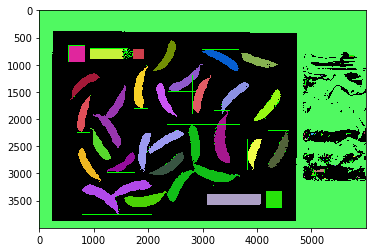

In [0]:
img = cv2.imread('109.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# binarize the image
ret, bw = cv2.threshold(gray, 128, 255, 
cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# find connected components
connectivity = 4
nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(bw, connectivity, cv2.CV_32S)
sizes = stats[1:, -1]; nb_components = nb_components - 1
min_size = 250 #threshhold value for objects in scene
img2 = np.zeros((img.shape), np.uint8)
for i in range(0, nb_components+1):
    # use if sizes[i] >= min_size: to identify your objects
    color = np.random.randint(255,size=3)
    # draw the bounding rectangele around each object
    cv2.rectangle(img2, (stats[i][0],stats[i][1]),(stats[i][0]+stats[i][2],stats[i][1]+stats[i][3]), (0,255,0), 2)
    img2[output == i + 1] = color

plt.imshow(img2)

croping text

In [0]:
import cv2
import numpy as np

# load image
img = cv2.imread('109.jpeg') 
rsz_img = cv2.resize(img, None, fx=0.25, fy=0.25) # resize since image is huge
gray = cv2.cvtColor(rsz_img, cv2.COLOR_BGR2GRAY) # convert to grayscale

# threshold to get just the signature
retval, thresh_gray = cv2.threshold(gray, thresh=100, maxval=255, type=cv2.THRESH_BINARY)

# find where the signature is and make a cropped region
points = np.argwhere(thresh_gray==1) # find where the black pixels are
points = np.fliplr(points) # store them in x,y coordinates instead of row,col indices
x, y, w, h = cv2.boundingRect(points) # create a rectangle around those points
x, y, w, h = x-10, y-10, w+20, h+20 # make the box a little bigger
crop = gray[y:y+h, x:x+w] # create a cropped region of the gray image

# get the thresholded crop
retval, thresh_crop = cv2.threshold(crop, thresh=200, maxval=255, type=cv2.THRESH_BINARY)

# # display
# cv2.imshow("Cropped and thresholded image", thresh_crop) 
# cv2.waitKey(0)

task

In [0]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [0]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [0]:
image = get_image("123.png")
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [0]:
clf = KMeans(n_clusters = 10)#number of colors here
labels = clf.fit_predict(modified_image)

[array([121.28738183, 114.48427552,  82.64769439]),
 array([85.46212832, 93.71357643, 35.71992056]),
 array([142.60294493, 135.56295516, 120.83994506]),
 array([184.06423921, 177.65075062, 169.78736163]),
 array([174.34237569, 167.74048018, 155.40752062]),
 array([24.70765593, 24.46467632, 32.16405557]),
 array([159.94477616, 153.24891254, 140.77867236]),
 array([63.44139696, 74.20799049, 20.32702505]),
 array([141.67387543,  33.73053633,  45.23788927]),
 array([ 46.50686436,  79.6523888 , 133.17902252])]

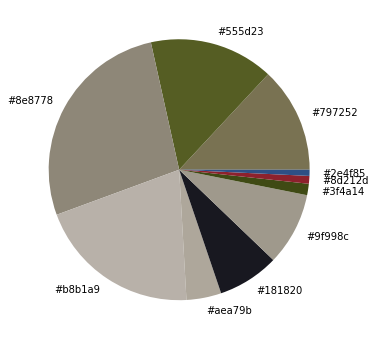

In [0]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

if (True):#if we need to showing the pie chart
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

rgb_colors